# Mount Google Drive to Colab from same account

In [ ]:
#This will mount the drive into colab
from google.colab import drive
drive.mount('/content/drive') 

# Mount Google Drive to Colab when Colab account is different than Google Drive account

In [1]:
#Reference: https://stackoverflow.com/questions/71695387/connecting-to-a-different-google-drive-than-the-one-logged-into-google-colab/71696254#71696254

!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=xKF311Wx61VjVFkrGfXVCvEdDoJONhsw%2FED1yGWw6ds'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fww

# Setup stuff

In [ ]:
# READ BEFORE RUNNING THIS
# check directory - if train_new, valid_new, test_new
# and their subdirectories exist then don't run this cell
#These directories store the images of the 30 actors after the face detection is done

# import os
# trainnew_path = '/content/drive/MyDrive/Deep Learning Project/data/train_new'
# validnew_path = '/content/drive/MyDrive/Deep Learning Project/data/valid_new'
# testnew_path = '/content/drive/MyDrive/Deep Learning Project/data/test_new'

# os.mkdir(trainnew_path)
# os.mkdir(validnew_path)
# os.mkdir(testnew_path)

# for i in range(1, 31):
#  os.mkdir(f"{trainnew_path}/actor_{i}")
#  os.mkdir(f"{validnew_path}/actor_{i}")
#  os.mkdir(f"{testnew_path}/actor_{i}")

# Face Detection using MTCNN

Reference for these cells: https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/


Installing MTCNN

In [ ]:
!pip install mtcnn  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.9 MB/s eta 0:00:00


Checking the version of MTCNN

In [ ]:
import mtcnn
print(mtcnn.__version__) #mtcnn version is 0.1.0 which is good

0.1.0


In [ ]:
#importing libraries for face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from glob import glob
import numpy as np
import pandas as pd

In [ ]:
#function to extract face of actor from a given photograph
def extract_face(filename, required_size=(224, 224)): #224 by 224 is needed for VGGFace
  pixels = pyplot.imread(filename) # load image from file as numpy array
  detector = MTCNN()  # create the MTCNN detector, using default weights

  results = detector.detect_faces(pixels) # detect the faces in the image
  #print(results) #results is a list of dictionaries
  faces_array = [] #this will store the pixels of the faces detected

  #for each face
  for i in range(len(results)):
    #print(results[i]['confidence'])
    if results[i]['confidence'] > 0.85:  #if you are more than 85% confident that it is a face
      # extract the bounding box from the face
      x1, y1, width, height = results[i]['box'] 
      x2, y2 = x1 + width, y1 + height

      # extract the face pixels
      face = pixels[y1:y2, x1:x2]

      image = Image.fromarray(face) #getting the PIL Image
      image = image.resize(required_size) #resize image to 224 x 224 
      face_array = asarray(image) #convert resized image back to numpy array
      faces_array.append(face_array) #add resized image to list of faces

  return faces_array #return the array of faces (numpy array faces)


Checking length of train, valid and test directories to make sure they contain 30 actors (1 actor per folder).

In [ ]:
train_images = glob('/content/drive/MyDrive/Deep Learning Project/data/train/*')
print(train_images)
print(len(train_images))

['/content/drive/MyDrive/Deep Learning Project/data/train/actor_1', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_2', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_3', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_4', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_5', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_6', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_7', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_8', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_9', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_10', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_11', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_12', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_13', '/content/drive/MyDrive/Deep Learning Project/data/train/actor_14', '/content/drive/MyDrive/Deep Learning Project/data/train

In [ ]:
valid_images = glob('/content/drive/MyDrive/Deep Learning Project/data/valid/*')
print(valid_images)
print(len(valid_images))

['/content/drive/MyDrive/Deep Learning Project/data/valid/actor_1', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_2', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_3', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_4', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_5', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_6', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_7', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_8', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_9', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_10', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_11', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_12', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_13', '/content/drive/MyDrive/Deep Learning Project/data/valid/actor_14', '/content/drive/MyDrive/Deep Learning Project/data/valid

In [ ]:
test_images = glob('/content/drive/MyDrive/Deep Learning Project/data/test/*')
print(test_images)
print(len(test_images))

['/content/drive/MyDrive/Deep Learning Project/data/test/actor_1', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_2', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_3', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_4', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_5', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_6', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_7', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_8', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_9', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_10', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_11', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_12', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_13', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_14', '/content/drive/MyDrive/Deep Learning Project/data/test/actor_15', '/c

We will go through each image for each actor in train, valid and test folders and do face detection by calling extract_face. I deleted the cell outputs because they were too long (lots of unnecessary output).

In [ ]:
from PIL import Image

training_faces_dict = {}
valid_faces_dict = {}
test_faces_dict = {}

counter = 0
for folder in train_images: #for each actor
  actor_name = str(folder.split('/')[-1])
  training_faces_dict[actor_name] = []
  train_images_for_actor = glob(str(folder)+'/*')
  
  for image in train_images_for_actor: #for all images for this actor
    #load the photo and extract the faces in 
    faces = extract_face(image) #list of faces for 1 image

    training_faces_dict[actor_name].append(faces)
    for face in faces:
      face_img = Image.fromarray(obj=face, mode="RGB")
      face_img.save(f'/content/drive/MyDrive/Deep Learning Project/data/train_new/{actor_name}/{counter}.png')
      counter += 1
  print("Done with an actor")

print("Done with saving training")

In [ ]:
counter = 0
for folder in valid_images:
  actor_name = str(folder.split('/')[-1])
  valid_faces_dict[actor_name] = []
  valid_images_for_actor = glob(str(folder)+'/*')
  for image in valid_images_for_actor:
    #load the photo and extract the faces in 
    faces = extract_face(image) #list of faces for 1 image
    valid_faces_dict[actor_name].append(faces)
    for face in faces:
      face_img = Image.fromarray(obj=face, mode="RGB")
      face_img.save(f'/content/drive/MyDrive/Deep Learning Project/data/valid_new/{actor_name}/{counter}.png')
      counter += 1

print("Done with saving validation")

In [ ]:
counter = 0
for folder in test_images:
  actor_name = str(folder.split('/')[-1])
  test_faces_dict[actor_name] = []
  test_images_for_actor = glob(str(folder)+'/*')
  for image in test_images_for_actor:
    #load the photo and extract the faces in 
    faces = extract_face(image) #list of faces for 1 image
    test_faces_dict[actor_name].append(faces)
    for face in faces:
      face_img = Image.fromarray(obj=face, mode="RGB")
      face_img.save(f'/content/drive/MyDrive/Deep Learning Project/data/test_new/{actor_name}/{counter}.png')
      counter += 1

print("Done with saving testing")

# Model 1: VGGFace for face recognition

Reference for these cells: https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

## Setup for VGGFace

Installing vggface module with Keras library implementation

In [ ]:
#Reference: https://stackoverflow.com/questions/68862735/keras-vggface-no-module-named-keras-engine-topology
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-eydwwxvn
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-eydwwxvn
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=ac84da841ebca413ed5dcab63ef9d5884e4ed100a692ed6227e35d722ea141a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-8y_qj_6e/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00


20952

In [ ]:
import keras_vggface
print(keras_vggface.__version__) #we can see that the version is 0.6

0.6


In [ ]:
#importing some necessary modules for face recognition in VGGFace
#from mtcnn.mtcnn import MTCNN
from glob import glob
import numpy as np
import pandas as pd
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions


## Image Augmentation for VGGFace

Image Augmentation (to increase trainining, validation and testing sizes)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #image augmentation (make new images)

#we are doing flipping, rescaling and other transformations to increase size of dataset since we don't have enough images in our dataset.
BATCH_SIZE = 32

train_augmentation = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip=True,
        #vertical_flip = True,
        width_shift_range= 0.2, 
        height_shift_range= 0.2, 
        brightness_range=[0.6,1.4], 
        fill_mode = "constant"
        )

test_augmentation = ImageDataGenerator(rescale=1./255)

#flow_from_directory() will get images on the fly, these augmented images are not stored in google drive
training_set = train_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/train_new/',
        target_size = (224, 224),
        batch_size = BATCH_SIZE,
        class_mode='categorical', 
        seed = 42)

validation_set = test_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/valid_new/',
        target_size=(224, 224),
        batch_size = BATCH_SIZE,
        class_mode='categorical')

test_set = test_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/test_new/',
        target_size=(224, 224),
        batch_size = BATCH_SIZE,
        class_mode='categorical')

label_map = training_set.class_indices
label_map

Found 916 images belonging to 30 classes.
Found 124 images belonging to 30 classes.
Found 123 images belonging to 30 classes.


{'actor_1': 0,
 'actor_10': 1,
 'actor_11': 2,
 'actor_12': 3,
 'actor_13': 4,
 'actor_14': 5,
 'actor_15': 6,
 'actor_16': 7,
 'actor_17': 8,
 'actor_18': 9,
 'actor_19': 10,
 'actor_2': 11,
 'actor_20': 12,
 'actor_21': 13,
 'actor_22': 14,
 'actor_23': 15,
 'actor_24': 16,
 'actor_25': 17,
 'actor_26': 18,
 'actor_27': 19,
 'actor_28': 20,
 'actor_29': 21,
 'actor_3': 22,
 'actor_30': 23,
 'actor_4': 24,
 'actor_5': 25,
 'actor_6': 26,
 'actor_7': 27,
 'actor_8': 28,
 'actor_9': 29}

32


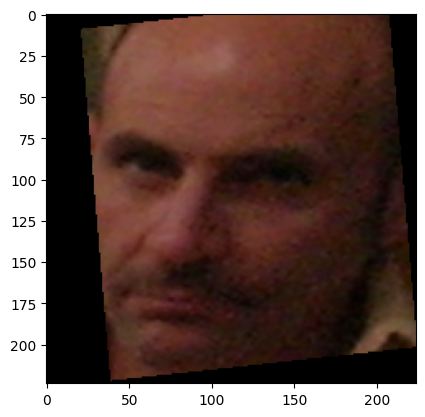

In [ ]:
import matplotlib.pyplot as plt

images, _ = next(training_set)
# print(next(training_set))
print(len(images))
plt.imshow(images[0]) # display first image from batch

## Model creation and compilation

Creating VGGFace model with ResNet-50

In [ ]:
vgg = VGGFace(model='vgg16', weights = "vggface", input_shape = (224, 224, 3), include_top = False) #include_top = False so we remove the last fully connected layers. weights = "vggface" so it is pre-trained on vggface dataset

In [ ]:
vgg.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
# don't train existing layers (every layer except last ones which we already removed)
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
import keras 

#function to create a model
def create_model(num_layers = 0, optimizer = None):
  model = Sequential()
  model.add(vgg) #adding previous model without output layer

  model.add(Flatten())
  if num_layers == 2:
    model.add(Dense(512, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
  elif num_layers == 1:
    model.add(Dense(128, activation = "relu"))
  
  model.add(Dense(30, activation = "softmax")) #30 neurons for the 30 actor categories
  model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy']) #Compiling model with categorical_crossentropy

  return model

In [ ]:
#Hyperparameters I tried:
#learning_rates = [0.01, 0.1, 0.2]
#number of hidden layers = 0,1,2 with number of neurons in the layers fixed as shown in create_model
#optimizers = [keras.optimizers.SGD(), eras.optimizers.Adam()]
#BATCH_SIZE = 32 always

model = create_model(num_layers = 2, optimizer = keras.optimizers.Adam(learning_rate = 0.01))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vggface_vgg16 (Functional)  (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               12845568  
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 30)                3870      
                                                                 
Total params: 27,629,790
Trainable params: 12,915,102
Non-trainable params: 14,714,688
_________________________________________________________________


## Fitting model

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

#make fitting process stable across multiple runs by setting random seed
def reset_seeds():
   np.random.seed(42) 
   tf.random.set_seed(42)

reset_seeds() 

In [ ]:
#Fitting model
history = model.fit(
  training_set,
  steps_per_epoch = 916 // BATCH_SIZE,
  validation_data= validation_set,
  #callbacks=[callback],  
  epochs = 10
  #validation_steps= len(validation_set) // BATCH_SIZE
)

Epoch 1/10
28/28 [==============================] - 17s 597ms/step - loss: 3.7763 - accuracy: 0.0950 - val_loss: 2.7405 - val_accuracy: 0.2500
Epoch 2/10
28/28 [==============================] - 16s 583ms/step - loss: 2.3164 - accuracy: 0.2868 - val_loss: 1.6508 - val_accuracy: 0.5242
Epoch 3/10
28/28 [==============================] - 16s 568ms/step - loss: 1.6470 - accuracy: 0.4921 - val_loss: 1.4866 - val_accuracy: 0.4839
Epoch 4/10
28/28 [==============================] - 15s 550ms/step - loss: 1.3782 - accuracy: 0.5724 - val_loss: 1.4606 - val_accuracy: 0.5645
Epoch 5/10
28/28 [==============================] - 17s 594ms/step - loss: 1.2294 - accuracy: 0.6301 - val_loss: 1.3064 - val_accuracy: 0.5645
Epoch 6/10
28/28 [==============================] - 18s 658ms/step - loss: 1.2065 - accuracy: 0.6267 - val_loss: 1.3486 - val_accuracy: 0.6048
Epoch 7/10
28/28 [==============================] - 15s 550ms/step - loss: 1.1855 - accuracy: 0.6505 - val_loss: 1.3966 - val_accuracy: 0.6532

## Learning curves for VGGFace

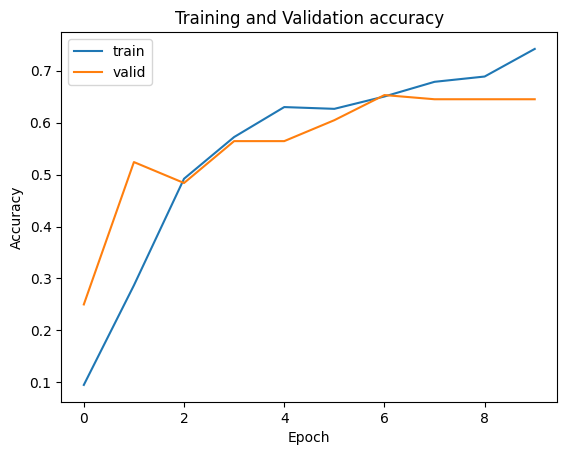

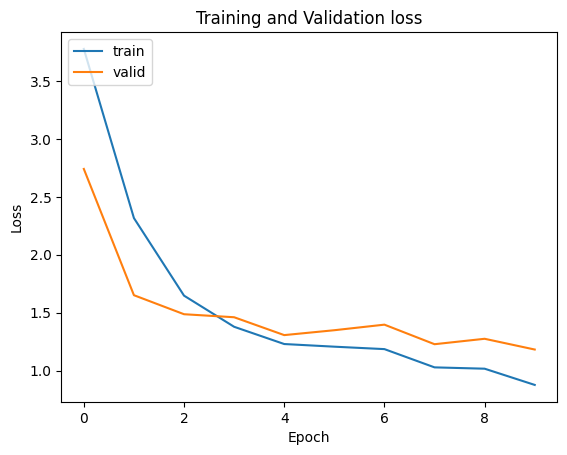

In [ ]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Code to load and save VGGFace model

Save model then download

In [ ]:
model.save("great model.h5")

Load model for later use

In [ ]:
import keras
model = keras.models.load_model('great model.h5')

## Predictions on test set for VGGFace

In [ ]:
from PIL import Image
from glob import glob

index_actor_dict = {} #stores actor names in a dictionary by index


for key, val in label_map.items():
  index_actor_dict[str(val)] = str(key)


print(index_actor_dict) #this is the key and values from label_map but reversed

{'0': 'actor_1', '1': 'actor_10', '2': 'actor_11', '3': 'actor_12', '4': 'actor_13', '5': 'actor_14', '6': 'actor_15', '7': 'actor_16', '8': 'actor_17', '9': 'actor_18', '10': 'actor_19', '11': 'actor_2', '12': 'actor_20', '13': 'actor_21', '14': 'actor_22', '15': 'actor_23', '16': 'actor_24', '17': 'actor_25', '18': 'actor_26', '19': 'actor_27', '20': 'actor_28', '21': 'actor_29', '22': 'actor_3', '23': 'actor_30', '24': 'actor_4', '25': 'actor_5', '26': 'actor_6', '27': 'actor_7', '28': 'actor_8', '29': 'actor_9'}


In [ ]:
#This cell creates stores the key as actor number and then value is a list of image paths for that actor

test_actor_list = glob("/content/gdrive/My Drive/Deep Learning Project/data/test_new/*")
index_img_dict = {}

for actor_folder in test_actor_list:
  actor = actor_folder.split('/')[-1]
  actor_num = actor.split('_')[-1]
  actor_images = glob(f"/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_{actor_num}/*")
  index_img_dict[actor_num] = actor_images

print(index_img_dict)

{'29': ['/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_29/135.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_29/134.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_29/137.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_29/136.png'], '12': ['/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_12/64.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_12/65.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_12/63.png'], '13': ['/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_13/67.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_13/66.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_13/68.png'], '23': ['/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_23/111.png', '/content/gdrive/My Drive/Deep Learning Project/data/test_new/actor_23/112.png', '/

In [ ]:
prediction_results = {} #this will store the results of predictions for actor

#For each actor
for i in range(1, len(index_actor_dict) + 1):
  prediction_results[str(i)] = {'correct': 0, 'wrong': 0, 'total_imgs': len(index_img_dict[str(i)])}

print(prediction_results)
print(len(prediction_results))

{'1': {'correct': 0, 'wrong': 0, 'total_imgs': 6}, '2': {'correct': 0, 'wrong': 0, 'total_imgs': 7}, '3': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '4': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '5': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '6': {'correct': 0, 'wrong': 0, 'total_imgs': 3}, '7': {'correct': 0, 'wrong': 0, 'total_imgs': 6}, '8': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '9': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '10': {'correct': 0, 'wrong': 0, 'total_imgs': 5}, '11': {'correct': 0, 'wrong': 0, 'total_imgs': 3}, '12': {'correct': 0, 'wrong': 0, 'total_imgs': 3}, '13': {'correct': 0, 'wrong': 0, 'total_imgs': 3}, '14': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '15': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '16': {'correct': 0, 'wrong': 0, 'total_imgs': 6}, '17': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '18': {'correct': 0, 'wrong': 0, 'total_imgs': 5}, '19': {'correct': 0, 'wrong': 0, 'total_imgs': 4}, '20': {'correct': 0, 'wrong': 0, 'total

In [ ]:
#This cell is where we actually go through all the test images and make predictions
from PIL import Image

#keep track of correct and wrong predictions
num_of_correct_preds = 0
num_of_wrong_preds = 0

for actor_num, actor_imgs in index_img_dict.items(): #actor_num is between 1 and 30
  for im in actor_imgs:
    actor_face = np.asarray(Image.open(im)) #numpy array for image
    actor_face = actor_face.astype('float32') 
    #actor_face = actor_face / 255.
    
    samples = expand_dims(actor_face, axis=0) #expand numpy array from (224, 224, 3) to (1,224,224,3)
    
    output_prob = model.predict(samples, verbose = 0) #list of 30 probabilities (1 for each actor)
    max_prob_index = np.argmax(output_prob) #We take the index of the maximum probability as our index
    
    val_of_index_in_prediction = output_prob[0][max_prob_index] #get the maximum probability
    corresponding_actor = str(index_actor_dict[str(max_prob_index)])[-1] #get actor number for this maximum probability (between 1 and 30)

    print(output_prob)
    #print(max_prob_index)
    print(corresponding_actor)
    print(actor_num)

    
    if str(corresponding_actor) == str(actor_num):
      prediction_results[str(int(corresponding_actor) + 1)]['correct'] += 1
      num_of_correct_preds += 1
    else:
      prediction_results[str(int(corresponding_actor) + 1)]['wrong'] += 1
      num_of_wrong_preds += 1

print(prediction_results)
print("Number of correct predictions: " , num_of_correct_preds)
print("Number of wrong predictions: ", num_of_wrong_preds)
accuracyOnTestSet = num_of_correct_preds / (num_of_correct_preds + num_of_wrong_preds)

print("Accuracy on test set: {:0.2f}".format(accuracyOnTestSet))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
8
29
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]
9
29
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]
9
29
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]
9
29
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]
9
12
[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  7.516396e-36 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
2
12
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0

# Model 2: FaceNet for face recognition

## Image reading for FaceNet

In [23]:
#Reference: https://www.youtube.com/watch?v=zBOavqh3kWU
from keras.preprocessing.image import ImageDataGenerator #image augmentation (make new images)

#we are doing flipping, rescaling and other transformations to increase size of dataset since we don't have enough images in our dataset.
BATCH_SIZE = 32

train_augmentation = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        shear_range= 0.2,
        zoom_range= 0.2,
        horizontal_flip=True,
        #vertical_flip = True,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        brightness_range=[0.6,1.4], 
        fill_mode = "constant"
        )

test_augmentation = ImageDataGenerator(rescale=1./255)

#flow_from_directory() will get images on the fly, these augmented images are not stored in google drive
training_setfacenet = train_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/train_new/',
        target_size = (160, 160),
        batch_size = BATCH_SIZE,
        class_mode='categorical', 
        seed = 42)

validation_setfacenet = test_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/valid_new/',
        target_size=(160, 160),
        batch_size = BATCH_SIZE,
        class_mode='categorical')

test_setfacenet = test_augmentation.flow_from_directory(
        '/content/gdrive/My Drive/Deep Learning Project/data/test_new/',
        target_size=(160, 160),
        batch_size = BATCH_SIZE,
        class_mode='categorical')


label_map = training_setfacenet.class_indices
label_map

Found 916 images belonging to 30 classes.
Found 124 images belonging to 30 classes.
Found 123 images belonging to 30 classes.


{'actor_1': 0,
 'actor_10': 1,
 'actor_11': 2,
 'actor_12': 3,
 'actor_13': 4,
 'actor_14': 5,
 'actor_15': 6,
 'actor_16': 7,
 'actor_17': 8,
 'actor_18': 9,
 'actor_19': 10,
 'actor_2': 11,
 'actor_20': 12,
 'actor_21': 13,
 'actor_22': 14,
 'actor_23': 15,
 'actor_24': 16,
 'actor_25': 17,
 'actor_26': 18,
 'actor_27': 19,
 'actor_28': 20,
 'actor_29': 21,
 'actor_3': 22,
 'actor_30': 23,
 'actor_4': 24,
 'actor_5': 25,
 'actor_6': 26,
 'actor_7': 27,
 'actor_8': 28,
 'actor_9': 29}

Reference: https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/

In [24]:
import os
import matplotlib.pyplot as plt
from numpy import asarray 
from PIL import Image
import cv2


# load images of faces in a directory (basically an actor directory within train_new, valid_new or test_new)
def load_faces(directory, required_size = (160, 160)):
  faces = list()
  # enumerate files
  print(os.listdir(directory))
  for filename in os.listdir(directory):
    # path
    path = directory + filename
    
    image = Image.open(path) # load image from file
    image = image.convert('RGB')     # convert to RGB, if needed

    #image = Image.fromarray(face)
    image = image.resize(required_size)

    face_array = asarray(image)
    faces.append(face_array)
  return faces


# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
  X, y = list(), list()
  #faces, labels = list(), list()
  # enumerate folders, on per class
  for subdir in os.listdir(directory):
    # path
    path = directory + subdir + '/'
    
    # skip any files that might be in the dir
    if not os.path.isdir(path):
      continue
    
    # load all faces in the subdirectory
    faces = load_faces(path)

    # create labels
    labels = [subdir for _ in range(len(faces))]
    # summarize progress
    print('loaded %d examples for class: %s' % (len(faces), subdir))
    # store
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)

In [26]:
trainX, trainY = load_dataset("/content/gdrive/My Drive/Deep Learning Project/data/train_new/")

['919.png', '915.png', '912.png', '930.png', '906.png', '918.png', '936.png', '910.png', '908.png', '909.png', '934.png', '928.png', '914.png', '924.png', '905.png', '923.png', '913.png', '932.png', '927.png', '916.png', '922.png', '935.png', '911.png', '925.png', '907.png', '926.png', '920.png']
loaded 27 examples for class: actor_27
['1030.png', '1040.png', '1028.png', '1026.png', '1025.png', '1035.png', '1034.png', '1013.png', '1011.png', '1022.png', '1017.png', '1016.png', '1031.png', '1038.png', '1041.png', '1029.png', '1012.png', '1037.png', '1044.png', '1039.png', '1015.png', '1043.png', '1033.png', '1021.png', '1032.png', '1010.png', '1020.png', '1036.png', '1023.png', '1042.png', '1019.png', '1014.png', '1018.png', '1027.png']
loaded 34 examples for class: actor_30
['835.png', '831.png', '824.png', '838.png', '845.png', '836.png', '841.png', '837.png', '825.png', '820.png', '839.png', '828.png', '819.png', '821.png', '848.png', '833.png', '840.png', '830.png', '842.png', '826.

In [27]:
print(trainX.shape)
print(trainY.shape)

(916, 160, 160, 3)
(916,)


In [28]:
print(trainX)
print(trainY)

[[[[ 94 107 112]
   [ 92 107 113]
   [ 89 106 114]
   ...
   [ 59  58  64]
   [ 60  59  65]
   [ 59  58  64]]

  [[ 95 108 114]
   [ 93 108 115]
   [ 90 107 114]
   ...
   [ 60  59  65]
   [ 59  58  65]
   [ 60  59  67]]

  [[ 96 108 116]
   [ 93 107 114]
   [ 90 108 112]
   ...
   [ 59  58  64]
   [ 59  58  64]
   [ 59  58  65]]

  ...

  [[ 30  30  32]
   [ 29  29  31]
   [ 28  28  30]
   ...
   [252 253 255]
   [253 254 255]
   [254 255 255]]

  [[ 30  30  32]
   [ 29  29  33]
   [ 29  29  31]
   ...
   [252 253 255]
   [253 254 255]
   [254 255 255]]

  [[ 30  31  34]
   [ 30  31  35]
   [ 30  30  32]
   ...
   [252 253 255]
   [252 253 255]
   [253 254 255]]]


 [[[133 117 111]
   [136 118 110]
   [138 119 111]
   ...
   [ 78  76  77]
   [ 76  74  75]
   [ 75  73  74]]

  [[134 114 108]
   [134 113 105]
   [141 118 108]
   ...
   [ 76  74  75]
   [ 76  74  75]
   [ 74  72  73]]

  [[137 116 107]
   [136 112 101]
   [140 113 102]
   ...
   [ 72  70  71]
   [ 74  72  73]
   [ 79  77

In [30]:
validX, validY = load_dataset("/content/gdrive/My Drive/Deep Learning Project/data/valid_new/")

['107.png', '104.png', '105.png', '106.png']
loaded 4 examples for class: actor_23
['21.png', '19.png', '22.png']
loaded 3 examples for class: actor_4
['63.png', '61.png', '64.png', '60.png']
loaded 4 examples for class: actor_12
['99.png']
loaded 1 examples for class: actor_21
['80.png', '84.png', '81.png']
loaded 3 examples for class: actor_16
['28.png', '32.png', '29.png', '27.png', '33.png', '30.png', '31.png']
loaded 7 examples for class: actor_6
['16.png', '14.png', '17.png', '15.png', '18.png']
loaded 5 examples for class: actor_3
['94.png', '92.png', '93.png', '95.png']
loaded 4 examples for class: actor_19
['55.png', '53.png', '54.png', '52.png']
loaded 4 examples for class: actor_10
['9.png', '2.png', '8.png', '7.png', '1.png', '6.png', '0.png', '3.png']
loaded 8 examples for class: actor_1
['85.png', '86.png', '87.png']
loaded 3 examples for class: actor_17
['91.png', '89.png', '88.png', '90.png']
loaded 4 examples for class: actor_18
['39.png', '40.png', '34.png', '37.png',

In [31]:
testX, testY = load_dataset("/content/gdrive/My Drive/Deep Learning Project/data/test_new/")

['86.png', '84.png', '87.png', '85.png']
loaded 4 examples for class: actor_17
['49.png', '48.png', '47.png', '46.png']
loaded 4 examples for class: actor_9
['61.png', '60.png', '62.png']
loaded 3 examples for class: actor_11
['38.png', '41.png', '40.png', '39.png', '37.png', '36.png']
loaded 6 examples for class: actor_7
['30.png', '29.png', '31.png', '24.png']
loaded 4 examples for class: actor_5
['125.png', '124.png', '126.png', '127.png']
loaded 4 examples for class: actor_27
['129.png', '130.png', '132.png', '133.png']
loaded 4 examples for class: actor_28
['111.png', '112.png', '110.png']
loaded 3 examples for class: actor_23
['96.png', '97.png', '99.png', '98.png']
loaded 4 examples for class: actor_19
['138.png', '140.png', '139.png', '141.png']
loaded 4 examples for class: actor_30
['76.png', '74.png', '77.png', '75.png']
loaded 4 examples for class: actor_15
['135.png', '137.png', '134.png', '136.png']
loaded 4 examples for class: actor_29
['22.png', '23.png', '20.png', '21.p

## Creating model and getting face embeddings (vectors)

In [32]:
!pip install keras_facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.7 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=b770a49e55c1a1c9f532268253553543d5434343c5e1c9f663de5f7472495544
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [34]:
from keras_facenet import FaceNet

In [35]:
model_facenet = FaceNet()
#model_facenet.extract()

In [36]:
#Reference: https://www.youtube.com/watch?v=15D7nmLnQcs
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray

# get the face embedding for one image
def get_embedding(model, face_pixels):
  face_pixels = face_pixels.astype('float32') 

  detections = model.extract(face_pixels, threshold = 0.95)
  #mean, std = face_pixels.mean(), face_pixels.std() 
  #face_pixels = (face_pixels - mean) / std  #standardizing the pixel values because facenet expects this to be done
  
  samples = expand_dims(face_pixels, axis=0)  # transform face into one sample
  pred = model.embeddings(samples)  # get vector face embedding
  
  return pred[0]


In [ ]:
# convert each face in the train, valid and test set to an embedding
newTrainX = list()
for face_pixels in trainX:
  embedding = get_embedding(model_facenet, face_pixels) #length of vector embedding is 512 
  newTrainX.append(embedding)

newTrainX = asarray(newTrainX)


In [39]:
print(trainX.shape)
print(newTrainX.shape)

(916, 160, 160, 3)
(916, 512)


In [ ]:
newValidX = list()
for face_pixels in validX:
  embedding = get_embedding(model_facenet, face_pixels)
  newValidX.append(embedding)
newValidX = asarray(newValidX)


In [42]:
print(validX.shape)
print(newValidX.shape)

(124, 160, 160, 3)
(124, 512)


In [ ]:
newTestX = list()
for face_pixels in testX:
  embedding = get_embedding(model_facenet, face_pixels)
  newTestX.append(embedding)
newTestX = asarray(newTestX)


In [44]:
print(testX.shape)
print(newTestX.shape)

(123, 160, 160, 3)
(123, 512)


## Save and load numpy arrays needed

In [45]:
from numpy import savez_compressed
savez_compressed('faces-embeddings.npz', newTrainX = newTrainX, trainY = trainY, newValidX = newValidX, validY = validY, newTestX = newTestX, testY = testY)
savez_compressed('faces.npz', trainX = trainX, trainY = trainY, validX = validX, validY = validY, testX =testX, testY = testY)


In [53]:
from numpy import load

faces = load('/content/faces.npz')
trainX, trainY, validX, validY, testX, testY = faces['trainX'], faces['trainY'], faces['validX'], faces['validY'], faces["testX"], faces["testY"]


face_embeddings = load('/content/faces-embeddings.npz')
newTrainX, trainY, newValidX, validY, newTestX, testY = face_embeddings['newTrainX'], face_embeddings['trainY'], face_embeddings['newValidX'], face_embeddings['validY'], face_embeddings["newTestX"], face_embeddings["testY"]

In [54]:
print(newTrainX.shape)

print(newValidX.shape)
print(newTestX.shape)
print(trainY.shape)
print(validY.shape)
print(testY.shape)

(916, 512)
(124, 512)
(123, 512)
(916,)
(124,)
(123,)


## Classifier on face embeddings

Normalize face embedding vectors

In [55]:
# We normalize the face embedding vectors because the distance between them will be computed. If they are not scaled to unit length, then distanes can blow out of proportion
# Face embeddings that are close correspond to same person, face embeddings that are far correspond to different people
from sklearn.preprocessing import *

#normalize each images embeddings across  all 512 features

newTrainX = normalize(newTrainX, norm='l2') 
newValidX = normalize(newValidX, norm='l2')
newTestX = normalize(newTestX, norm='l2')


In [56]:
print(newTrainX.shape)
print(newValidX.shape)
print(newTestX.shape)

(916, 512)
(124, 512)
(123, 512)


Training Linear SVM classifier

In [60]:
from sklearn.svm import SVC

# fit model
model = SVC(kernel='linear', C = 1.0)
model.fit(newTrainX, trainY)


SVC(kernel='linear')

Measure performance on validation and test set

In [58]:
from sklearn.metrics import accuracy_score

validY_preds = model.predict(newValidX)
testY_preds = model.predict(newTestX)

validation_accuracy = accuracy_score(validY, validY_preds)
test_accuracy = accuracy_score(validY, validY_preds)


In [59]:
print("Accuracy on validation set is {:0.2f}".format(validation_accuracy))
print("Accuracy on test set is {:0.2f}".format(test_accuracy))

Accuracy on validation set is 0.85
Accuracy on test set is 0.85
